# How do false positive matches to sketches scale with threshold and ksize?

for 100,000 50kb genomes, how does combinatorial containment work out?

In [1]:
%matplotlib inline
import sourmash
from sourmash.index.sqlite_index import LCA_SqliteDatabase

import random
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt

In [2]:
ls

LICENSE			       genomes-100k.sketch.k15.sqldb
Snakefile		       genomes-100k.sketch.k15.zip
Snakefile~		       genomes-100k.sketch.k17.sqldb
all.sig			       genomes-100k.sketch.k17.zip
basic-detection-10000bp.csv    genomes-100k.sketch.k19.sqldb
basic-detection-100bp.csv      genomes-100k.sketch.k19.zip
combinatorial.ipynb	       genomes-100k.sketch.k31.sqldb
detection-10kb-reads.ipynb     genomes-100k.sketch.k31.zip
detection.ipynb		       genomes-100k.sketch.k9.sqldb
genomes-100k.fa.gz	       genomes-100k.sketch.k9.zip
genomes-100k.sketch.k11.sqldb  scripts/
genomes-100k.sketch.k11.zip    single.fa.gz
genomes-100k.sketch.k13.sqldb  single.sig
genomes-100k.sketch.k13.zip


In [3]:
y = {}
for k in 9, 11, 13, 15, 17, 19:
    db = LCA_SqliteDatabase(f'genomes-100k.sketch.k{k}.sqldb')

    rresults = defaultdict(list)
    for n, sig in enumerate(db.signatures()):
        if n > 20:
            break
        mh = sig.minhash
        hashes = list(mh.hashes)
        subset = random.sample(hashes, 15)

        results = []
        hashval = subset.pop()
        matches = set(db.hashval_to_idx[hashval])
        #results.append((0, len(matches)))
        rresults[0].append(len(matches) - 1)

        i = 1
        for hashval in subset:
            matches.intersection_update(db.hashval_to_idx[hashval])
            rresults[i].append(len(matches) - 1)
            i += 1

    x = []
    for i in range(0, len(rresults)):
        n = i + 1
        avg = np.mean(rresults[i])
        sd = np.std(rresults[i])
        x.append(dict(n=n, avg=avg, sd=sd))
        
    y[k] = pd.DataFrame(x)


Text(0, 0.5, 'number of false positive sketch matches')

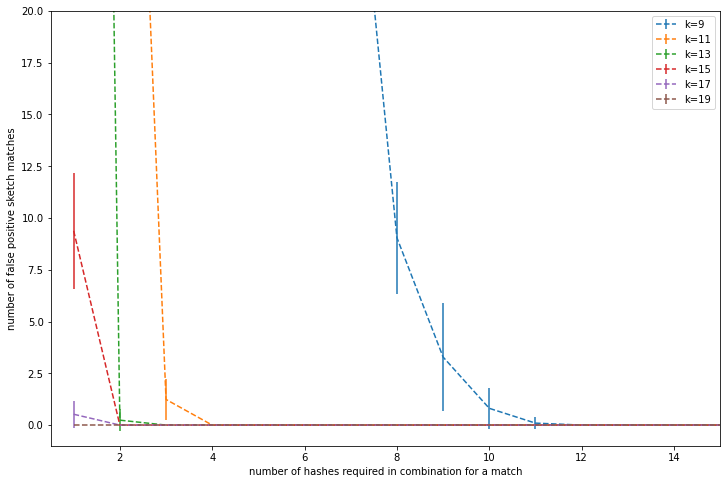

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

for k in y:
    df = y[k]
    ax.errorbar(df.n, df.avg, yerr=df.sd, fmt='--', label=f"k={k}")
    
ax.set_xlim([0.5, 15])
ax.set_ylim([-1, 20])
ax.legend(loc="upper right")
ax.set_xlabel('number of hashes required in combination for a match')
ax.set_ylabel('number of false positive sketch matches')